In [518]:
import pandas as pd
from nltk.tokenize import word_tokenize
import string

In [519]:
new_corpus = pd.read_csv('texts.csv', encoding='utf-8')

In [520]:
new_corpus.head()

,text
0,В 1930-е годы Советский Союз охватила лихорадк...
1,Олимпийская чемпионка по фигурному катанию Ал...
2,Российский врач-диетолог Римма Мойсенко объясн...
3,В 2019 году телеканал «Ю» запустил адаптацию з...
4,Актер Михаил Ефремов систематически употребл...


Данный корпус содержит тексты статей из новостного сайта lenta.ru. Датасет содержит 5001 запись

In [521]:
from statistics import median
text_of_all_news = []
for t in new_corpus['text']:
    text_of_all_news.append(t)
a = 0
for st in text_of_all_news:
    a += int(len(st.split()))
aver_words = a/new_corpus.shape[0]
med = []
for t in new_corpus['text']:
    med.append(int(len(t.split())))
med = median(med)
print('Количество строк: {}'.format(new_corpus.shape[0]))
print('Суммарное количество слов по всем статьям: {}'.format(a))
print('Среднее количество слов на одну статью: {}'.format(aver_words))
print('Медиана количества слов на одну статью: {}'.format(med))

Количество строк: 5001
Суммарное количество слов по всем статьям: 1026536
Среднее количество слов на одну статью: 205.26614677064586
Медиана количества слов на одну статью: 160


### Предобработка корпуса

In [718]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
punct = string.punctuation + "—" + "«" + "»"
from nltk.corpus import stopwords
stopwords_list = stopwords.words("russian") + ["это", "который", "наш", 
                                            "такой", "свой", "один", "другой", "всё", "все", "весь", "очень", "нужно",
                                            "каждый", "её","его", "ранее", "мочь", 
                                            "стать", "больший", "ваше", "самый", "понять",
                                            "ещё", "также", "например", "тот", "быть"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\redic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Напишем функцию, которая убирает все ненужные символы, оставляет только буквы, избавляется от местоимений-существительный, предлогов, союзов, частиц и междометий и приводит оставшиеся слова к начальной форме.

In [719]:
news = new_corpus['text'].to_list()

In [720]:
def _change(list_of_texts):
    for i in range(len(list_of_texts)):
        list_of_texts[i] = re.sub(r"[^а-яА-Я]",' ', list_of_texts[i])
        list_of_texts[i] = re.sub(r"\xa0",' ', list_of_texts[i])
        tokens = word_tokenize(list_of_texts[i])    
        tokens = [token.lower() for token in tokens if token not in stopwords_list]
        list_of_texts[i] = [word for word in tokens if word not in stopwords_list]
    return list_of_texts

def _speech(list_of_texts):
    all_lemma = []
    for i in range(len(list_of_texts)):
        one_lemma = []
        for word in list_of_texts[i]:
            if analyzer.parse(word)[0].tag.POS not in ('NPRO', 'PREP', 'CONJ', 'PRCL', 'INTJ'): 
                if analyzer.parse(word)[0].normal_form not in stopwords_list:
                    one_lemma.append(analyzer.parse(word)[0].normal_form)
        all_lemma.append(one_lemma)
    return all_lemma

## Обучим модель

Подготовим первый корпус к обучению

In [721]:
first_corpus_1 = _change(news)
first_corpus = _speech(first_corpus_1)

In [722]:
first_corpus[2]

['российский',
 'врач',
 'диетолог',
 'римма',
 'мойсенко',
 'объяснить',
 'почему',
 'однообразный',
 'питание',
 'вредить',
 'организм',
 'слово',
 'приводить',
 'издание',
 'эксперт',
 'предупреждать',
 'продукт',
 'день',
 'подряд',
 'опасно',
 'здоровье',
 'третий',
 'день',
 'употребление',
 'продукт',
 'особенно',
 'насыщенный',
 'белок',
 'иммунный',
 'система',
 'происходить',
 'сбой',
 'образоваться',
 'иммунный',
 'комплекс',
 'тормозить',
 'образование',
 'фермент',
 'пояснить',
 'мойсенко',
 'слово',
 'диетолог',
 'разнообразный',
 'питание',
 'благоприятно',
 'влиять',
 'микробиота',
 'помогать',
 'максимально',
 'усваивать',
 'продукт',
 'полезный',
 'вещество',
 'пищевой',
 'поведение',
 'нарушить',
 'человек',
 'толстеть',
 'соблюдение',
 'сбалансированный',
 'питание',
 'мойсенко',
 'напомнить',
 'регулярно',
 'медленно',
 'запивать',
 'пища',
 'вода',
 'автор',
 'книга',
 'похудение',
 'кетодиета',
 'жир',
 'доктор',
 'медицинский',
 'наука',
 'василий',
 'генерал',


In [723]:
import gensim 
from gensim.models import word2vec
from gensim.models import Word2Vec

In [758]:
model_en = word2vec.Word2Vec(first_corpus, vector_size=100, window=10, min_count=5, workers=4)

In [759]:
print(len(model_en.wv.index_to_key))

11840


In [791]:
print(model_en.wv.most_similar("экономика", topn=3))
print(model_en.wv.most_similar("человек", topn=3))
print(model_en.wv.most_similar("шоу", topn=3))
print(model_en.wv.most_similar("политика", topn=3))
print(model_en.wv.most_similar("зло", topn=3))

[('отрасль', 0.9450359344482422), ('снижение', 0.9434967041015625), ('сокращение', 0.9392783641815186)]
[('жертва', 0.8568994402885437), ('пожилой', 0.8424401879310608), ('умирать', 0.8257160782814026)]
[('сериал', 0.9687299728393555), ('фильм', 0.9646493196487427), ('стиль', 0.9630046486854553)]
[('политический', 0.9648329615592957), ('партия', 0.9364122152328491), ('политик', 0.9289891123771667)]
[('средневековье', 0.96869295835495), ('глупость', 0.9643157720565796), ('учебник', 0.9632648229598999)]


In [792]:
print(model_en.wv.most_similar(positive=["самолёт", "путешествие"], topn=1)[0][0])

взлёт


In [793]:
print(model_en.wv.most_similar(positive=["мир", "страна"], topn=1)[0][0])

франция


In [794]:
print(model_en.wv.most_similar(positive=["животное", "зоопарк"], topn=1)[0][0])

змея


In [795]:
model_en.wv.similarity('мир', 'земля')

0.4129651

## Дообучаем модель

Подготавливаем к обучению второй корпус, содержащий названия статей по таким темам как 'Интернет и СМИ', 'Путешествия', 'Из жизни'.

In [765]:
another_corpus = pd.read_csv('Russia_news.csv', encoding='utf-8')

In [766]:
another_corpus.head()

,title,topic
0,Microsoft обвиняется в подсуживании в пользу К...,Интернет и СМИ
1,Сайт кандидата в президенты США был взломан на...,Интернет и СМИ
2,ФБР выпустит предупреждение-2000 для правоохра...,Интернет и СМИ
3,Треть российских компьютерных систем не готова...,Интернет и СМИ
4,Интернет скоро похоронит бумажные письма,Интернет и СМИ


In [733]:
second_list = another_corpus['title'].to_list()

In [734]:
second_corpus_1 = _change(second_list)
second_corpus = _speech(second_list)

In [735]:
second_corpus[:10]

[['обвиняться', 'подсуживание', 'польза', 'каспаров'],
 ['сайт', 'кандидат', 'президент', 'сша', 'взломать', 'пять', 'минута'],
 ['фбр', 'выпустить', 'предупреждение', 'правоохранительный', 'орган'],
 ['треть', 'российский', 'компьютерный', 'система', 'готовый', 'год'],
 ['интернет', 'скоро', 'похоронить', 'бумажный', 'письмо'],
 ['центризбирком',
  'решить',
  'помочь',
  'электронный',
  'сми',
  'освещать',
  'выборы'],
 ['интернет', 'помнить', 'начинаться'],
 ['проблема', 'привести', 'химический', 'катастрофа'],
 ['неизвестный',
  'хакер',
  'взломать',
  'компьютерный',
  'сеть',
  'защита',
  'империя'],
 ['морской', 'пехота', 'бороться', 'червь']]

In [767]:
model_path = "movie_reviews.model"
print("Saving model...")
model_en.save(model_path)

Saving model...


In [768]:
model = word2vec.Word2Vec.load(model_path)

In [769]:
model.build_vocab(second_corpus, update=True) 
model.train(second_corpus, total_examples=model.corpus_count, epochs=5)

(2087084, 2264195)

In [770]:
print(model.wv.most_similar("экономика", topn=3))
print(model.wv.most_similar("человек", topn=3))
print(model.wv.most_similar("шоу", topn=3))
print(model.wv.most_similar("политика", topn=3))
print(model.wv.most_similar("зло", topn=3))

[('отрасль', 0.9608207941055298), ('снижение', 0.937723696231842), ('сокращение', 0.9282024502754211)]
[('опасный', 0.6137204766273499), ('перевалить', 0.6064729690551758), ('китаец', 0.6063274145126343)]
[('телешоу', 0.9125816226005554), ('шлеменко', 0.9117814898490906), ('реалить', 0.9115563035011292)]
[('политический', 0.9690498113632202), ('народ', 0.9116231799125671), ('выразить', 0.9103558659553528)]
[('религия', 0.94338059425354), ('неуместный', 0.9332910776138306), ('замысел', 0.9327937960624695)]


In [771]:
print(model.wv.most_similar(positive=["самолёт", "путешествие"], topn=5))

[('круизный', 0.9095914363861084), ('взлёт', 0.8897702097892761), ('лететь', 0.8896412253379822), ('авиалайнер', 0.8890817761421204), ('конюх', 0.8873189687728882)]


In [772]:
print(model.wv.most_similar(positive=["мир", "страна"], topn=1)[0][0])

европа


In [773]:
print(model.wv.most_similar(positive=["животное", "зоопарк"], topn=1)[0][0])

кошка


In [796]:
model.wv.similarity('мир', 'земля')

0.55804306

### Cоставим словарь синонимов для наиболее частотных слов корпуса

In [775]:
most_freq = model.wv.index_to_key[:50]

In [776]:
dict_syn = {}
synon = []
for word in most_freq:
    dict_need = []
    i = 5
    synonym = model.wv.most_similar(positive=[word], topn=i)
    for j in range(5):
        if (synonym[j-1][0] not in most_freq and synonym[j-1][0] not in synon):
                dict_need.append(synonym[j-1])
                synon.append(synonym[j-1][0])
        else:
            flag = True
            while flag:
                i += 1
                synonym = model.wv.most_similar(positive=[word], topn=i)
                if (synonym[i-1][0] not in most_freq and synonym[i-1][0] not in synon):
                    dict_need.append(synonym[j-1])
                    synon.append(synonym[j-1][0])
                    flag = False           
        dict_syn[word] = dict_need

In [778]:
dict_syn

{'год': [('октябрь', 0.5450462102890015),
  ('месяц', 0.7210620045661926),
  ('прошлое', 0.6141762137413025),
  ('полгода', 0.6040939092636108),
  ('срок', 0.5773062109947205)],
 'россия': [('турция', 0.7032037973403931),
  ('российский', 0.7732608914375305),
  ('крым', 0.7656062841415405),
  ('европейский', 0.7478435635566711),
  ('страна', 0.7233790755271912)],
 'человек': [('десятка', 0.5980625748634338),
  ('опасный', 0.6137204766273499),
  ('перевалить', 0.6064729690551758),
  ('китаец', 0.6063274145126343),
  ('смертельно', 0.6030400991439819)],
 'коронавирус': [('гебреисус', 0.8066800236701965),
  ('инфекция', 0.8752137422561646),
  ('коронавирусный', 0.872992217540741),
  ('воз', 0.8400510549545288),
  ('внебольничный', 0.8282806277275085)],
 'страна': [('франция', 0.7875500321388245),
  ('европа', 0.8092947602272034),
  ('турция', 0.8078528642654419),
  ('азия', 0.8048226237297058),
  ('восток', 0.7916008234024048)],
 'время': [('прямой', 0.5826212763786316),
  ('спокойный', 0

## Построение графов

In [747]:
import networkx as nx
import matplotlib.pyplot as plt

In [748]:
def _graf(word):
    try:
        sims = model.wv.most_similar(positive=[word], topn=10)
    except:
        print('No synonym for this word')
        return None
    G = nx.Graph()
    edges = [(word, sim[0], round(sim[1], 3)) for sim in sims]
    G.add_weighted_edges_from(edges)
    labels = nx.get_edge_attributes(G, "weight")    
    ego_network = nx.ego_graph(G, word)
    pos = nx.spring_layout(ego_network)
    nx.draw(ego_network, pos, with_labels=True)
    nx.draw_networkx_edge_labels(ego_network, pos, edge_labels=labels)
    options = {"node_size": 300, "node_color": "r"}
    nx.draw_networkx_nodes(ego_network, pos, nodelist=[word], **options)
    plt.show()

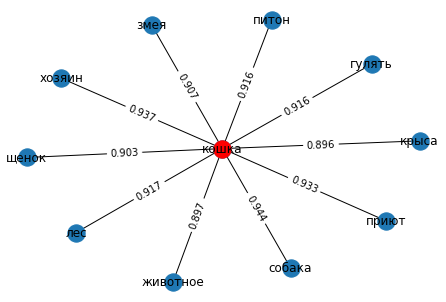

In [749]:
_graf('кошка')

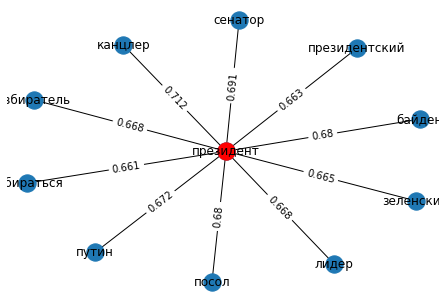

In [750]:
_graf('президент')

In [555]:
_graf('шпроты')

No synonym for this word
